# **Tugas EDA Day 21**

### **Import Library dan Load Dataset**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp/Tugas Day 21/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **No 1 Missing Data**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


di dapatkan bahwa Kolom **Total Charges** masih berupa object maka harus di ubah ke dalam bentuk numerik atau float

In [99]:
df1 = df.copy()

In [100]:
#Ubah Tipe Data Kolom Total Charges
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
# Step 2: Handle missing values by checking which columns
missing_values = df1.isnull().sum()
missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## **No 2 Duplicate Data**

In [102]:
#Drop duplicates
df_cleaned = df1.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Tidak ada data yang duplikat**

## **No 3 Descriptive Statistics**

In [103]:
# Descriptive Statistics
# Numeric columns summary
desc_numeric = df_cleaned.describe()
print("Descriptive Statistics - Numeric Columns:")
desc_numeric

Descriptive Statistics - Numeric Columns:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Insight Numerik**:

**tenure**: Rata-rata **32.37** bulan dengan **maksimum 72 bulan**. Sebagian besar pelanggan telah berlangganan **kurang dari 55 bulan (75%)**.



**MonthlyCharges**: Rata-rata biaya bulanan adalah **64.76 USD**, dengan rentang dari **18.25 USD** hingga **118.75 USD**.



**TotalCharges**: Nilai total rata-rata adalah **2283.3 USD**, dengan beberapa outlier mencapai hingga **8684.8 USD.**

In [104]:
# Categorical columns summary
desc_categorical = df_cleaned.describe(include='object')
print("Descriptive Statistics - Categorical Columns:")
desc_categorical

Descriptive Statistics - Categorical Columns:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


**Insight Kategorikal**:

**gender**: Proporsi pria dan wanita **cukup seimbang**.


**Churn**: **26,5% pelanggan churn**, sementara **73,5% bertahan**.


**InternetServic**e: Sebagian besar pelanggan menggunakan layanan **fiber optic (43,9%).**


**Contract**: Sebagian besar pelanggan menggunakan **kontrak bulan-ke-bulan (55%).**

## **No 4 Unvariate Analysis**

### **Univariate Analysis Numerical**

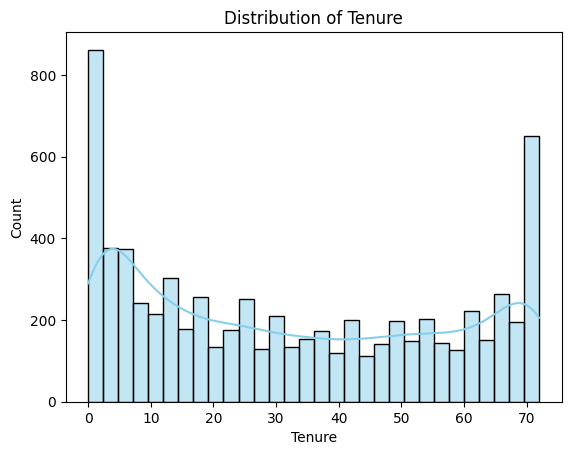

In [105]:
#Univariate Analysis (Distribution of Variables)

# Numerical variables distribution
sns.histplot(df_cleaned['tenure'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

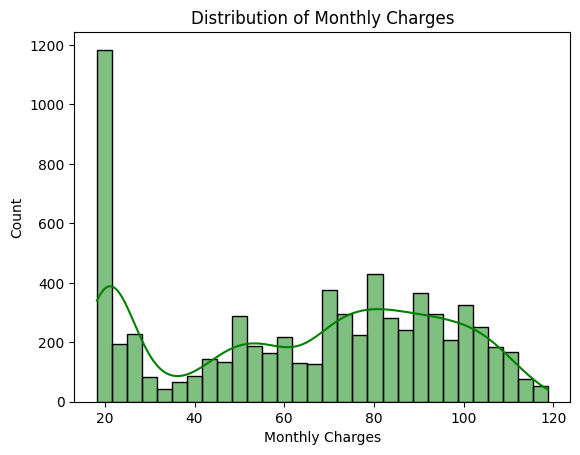

In [106]:
sns.histplot(df_cleaned['MonthlyCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

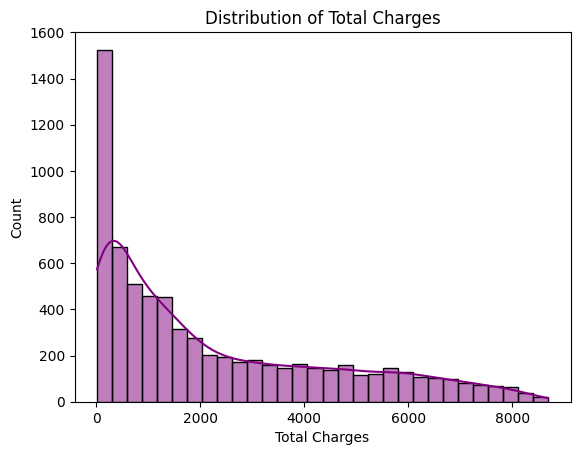

In [107]:
sns.histplot(df_cleaned['TotalCharges'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

**Analisis Univariate Numerik**


**tenure**: Pelanggan lebih sering memiliki lama berlangganan yang rendah, menunjukkan churn atau pelanggan baru yang lebih sering terjadi.

**MonthlyCharges** dan **TotalCharges**: Distribusi terlihat beragam dengan konsentrasi di biaya menengah.

### **Univariate Analysis Categorical**

<ipython-input-108-12222717c505>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_cleaned, ax=axs[0, 0], palette='Set1')
<ipython-input-108-12222717c505>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_cleaned, ax=axs[0, 1], palette='Set2')
<ipython-input-108-12222717c505>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InternetService', data=df_cleaned, ax=axs[1, 0], palette='Set3')
<ipython-input-108-12222717c505>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

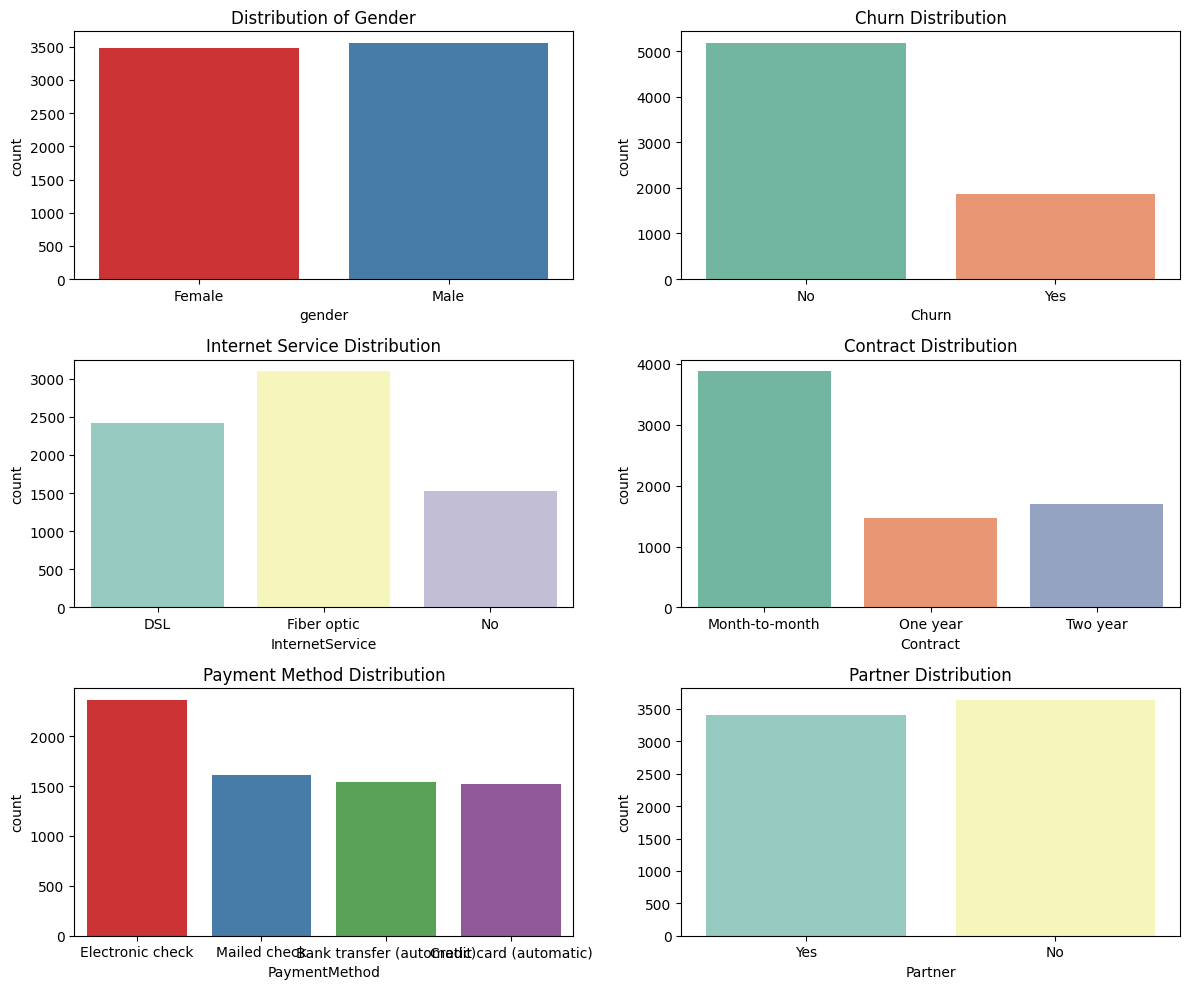

In [108]:
# Categorical variables distribution
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

sns.countplot(x='gender', data=df_cleaned, ax=axs[0, 0], palette='Set1')
axs[0, 0].set_title('Distribution of Gender')

sns.countplot(x='Churn', data=df_cleaned, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title('Churn Distribution')

sns.countplot(x='InternetService', data=df_cleaned, ax=axs[1, 0], palette='Set3')
axs[1, 0].set_title('Internet Service Distribution')

sns.countplot(x='Contract', data=df_cleaned, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Contract Distribution')

sns.countplot(x='PaymentMethod', data=df_cleaned, ax=axs[2, 0], palette='Set1')
axs[2, 0].set_title('Payment Method Distribution')

sns.countplot(x='Partner', data=df_cleaned, ax=axs[2, 1], palette='Set3')
axs[2, 1].set_title('Partner Distribution')

plt.tight_layout()
plt.show()


**Analysis Univarite Kategorikal**:

**Churn**: Mayoritas pelanggan tidak churn (73,5%).


**InternetService**: Layanan internet fiber optic paling banyak digunakan.


**Contract**: Pelanggan dengan kontrak bulan-ke-bulan paling mendominasi.

## **No 5 Multivariate Analysis**

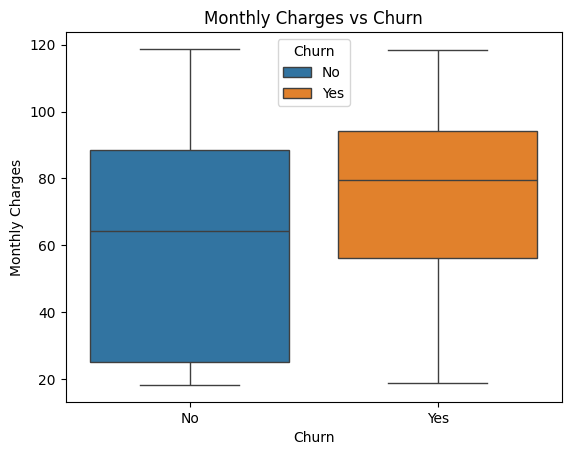

In [109]:
# Monthly Charges vs Churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cleaned, hue='Churn', legend = True)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

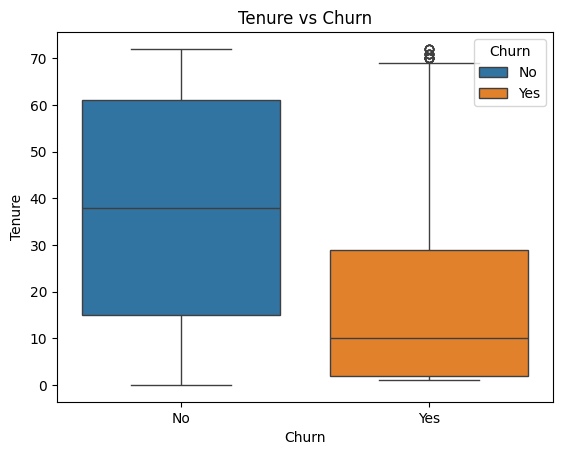

In [110]:
# Tenure vs Churn

sns.boxplot(x='Churn', y='tenure', data=df_cleaned, hue='Churn', legend=True)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

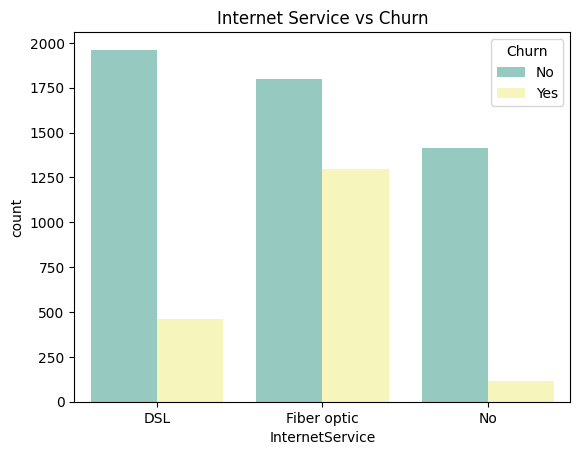

In [111]:
# Internet Service vs Churn

sns.countplot(x='InternetService', hue='Churn', data=df_cleaned, palette='Set3')
plt.title('Internet Service vs Churn')
plt.show()


**Analisis Multivariat**:


**Monthly Charges vs Churn**: Pelanggan yang churn cenderung membayar lebih tinggi per bulan.


**Tenure vs Churn**: Pelanggan dengan masa berlangganan lebih pendek memiliki kecenderungan untuk churn.


**Internet Service vs Churn**: Pelanggan layanan fiber optic memiliki kecenderungan churn lebih tinggi.

## **No 6 Deep Dive EDA**

### **Pertanyaan 1:**

Apakah pelanggan dengan kontrak jangka panjang memiliki tingkat churn lebih rendah?

In [112]:
# Pertanyaan 1: Apakah pelanggan dengan kontrak jangka panjang memiliki tingkat churn lebih rendah?
# Group by 'Contract' and calculate churn rate
contract_churn = df_cleaned.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
contract_churn['Churn Rate'] = contract_churn['Yes']
contract_churn_plot = contract_churn[['Churn Rate']].sort_values(by='Churn Rate', ascending=False)

### **Pertanyaan 2:**

Apakah pelanggan dengan layanan fiber optic lebih cenderung churn?

In [113]:
# Pertanyaan 2: Apakah pelanggan dengan layanan fiber optic lebih cenderung churn?
# Group by 'InternetService' and calculate churn rate
internet_service_churn = df_cleaned.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
internet_service_churn['Churn Rate'] = internet_service_churn['Yes']
internet_service_churn_plot = internet_service_churn[['Churn Rate']].sort_values(by='Churn Rate', ascending=False)

In [114]:
contract_churn_plot

Churn,Churn Rate
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [115]:
internet_service_churn_plot

Churn,Churn Rate
InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


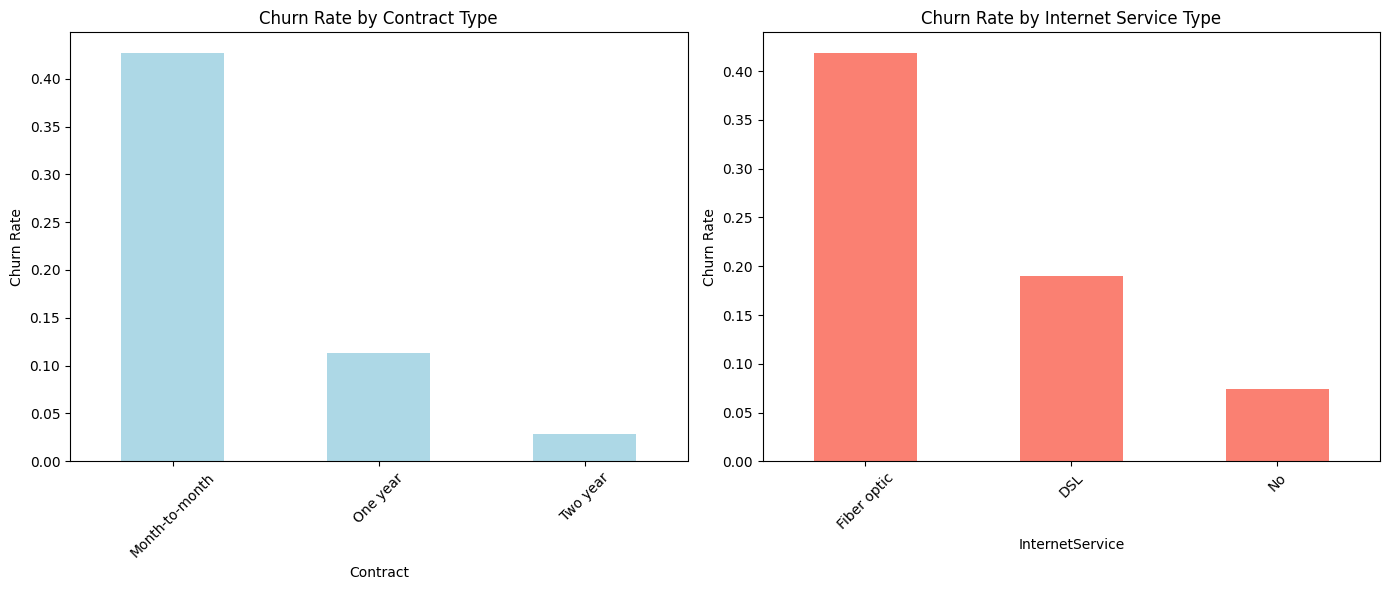

In [116]:
# Visualisasi
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Contract vs Churn Rate
contract_churn_plot.plot(kind='bar', ax=axs[0], color='lightblue', legend=False)
axs[0].set_title('Churn Rate by Contract Type')
axs[0].set_ylabel('Churn Rate')
axs[0].set_xticklabels(contract_churn_plot.index, rotation=45)

# Plot 2: Internet Service vs Churn Rate
internet_service_churn_plot.plot(kind='bar', ax=axs[1], color='salmon', legend=False)
axs[1].set_title('Churn Rate by Internet Service Type')
axs[1].set_ylabel('Churn Rate')
axs[1].set_xticklabels(internet_service_churn_plot.index, rotation=45)

plt.tight_layout()
plt.show()

**1. Churn Berdasarkan Tipe Kontrak:**


**Hasil:**

Pelanggan dengan kontrak bulan-ke-bulan memiliki tingkat churn tertinggi dibandingkan pelanggan dengan kontrak 1 tahun dan 2 tahun.


Pelanggan dengan kontrak bulanan lebih rentan untuk churn karena mereka tidak memiliki komitmen jangka panjang. Ini menunjukkan bahwa fleksibilitas yang diberikan oleh kontrak bulan-ke-bulan memudahkan pelanggan untuk berhenti.
Sebaliknya, pelanggan dengan kontrak jangka panjang (1 tahun atau 2 tahun) memiliki tingkat churn yang jauh lebih rendah karena mereka terikat untuk jangka waktu yang lebih lama.


**Insight:** Untuk mengurangi churn, perusahaan dapat mempertimbangkan untuk menawarkan insentif (seperti diskon atau bonus) kepada pelanggan dengan kontrak bulan-ke-bulan agar mereka beralih ke kontrak jangka panjang.

**2. Churn Berdasarkan Jenis Layanan Internet:**


**Hasil:**

Pelanggan yang menggunakan layanan Fiber Optic memiliki tingkat churn tertinggi dibandingkan pelanggan yang menggunakan DSL atau tidak memiliki layanan internet.


Layanan Fiber Optic mungkin menghadapi masalah seperti harga lebih tinggi atau ekspektasi kualitas yang lebih tinggi dari pelanggan, sehingga meningkatkan kemungkinan churn.


Pelanggan DSL atau mereka yang tidak menggunakan layanan internet cenderung lebih loyal dan memiliki tingkat churn yang lebih rendah.


**Insight:**

Perusahaan bisa memfokuskan upaya retensi pada pelanggan Fiber Optic, misalnya dengan memberikan promo, peningkatan kualitas layanan, atau penawaran harga yang lebih kompetitif.